In [1]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer, logging
from IPython.display import HTML
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
model_path = "best_model_old.pt"

# Load the tokenizer and model from the "roberta-base" pre-trained model
logging.set_verbosity_error()
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base").to(device)

# Load the saved state dict of the fine-tuned model
model.load_state_dict(torch.load(model_path, map_location="cpu"))

<All keys matched successfully>

In [34]:
from Word_contribution_Visualization import getContribution, getHtml, plotDetail

# with open("text_test.txt", "r") as f:
#     input_text = f.readline()
input_text = "Think of it like a fountain pop machine at a convenience store . Just on a much bigger scale ."
test_sentence = input_text.strip()

predicted_label, tokens, CS = getContribution(test_sentence, tokenizer, model, device)

if predicted_label == 0: print("The prediction result is: humans.")
else: print("The prediction result is: ChatGPT.")

html = getHtml(predicted_label, tokens, CS)
HTML(html)

The prediction result is: humans.


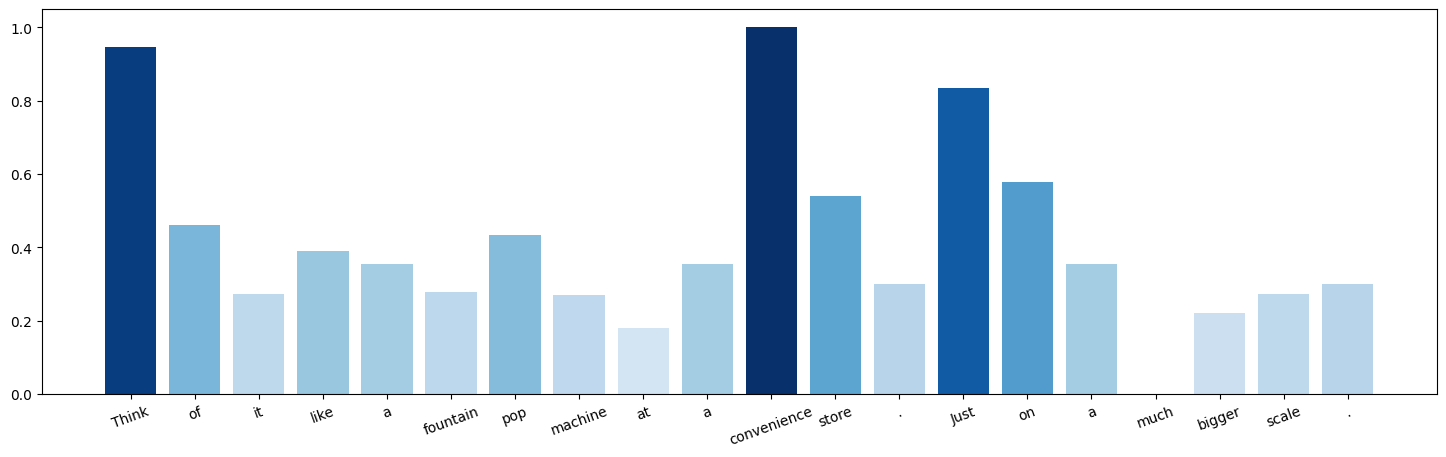

In [35]:
plotDetail(predicted_label, tokens, CS)